In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

### 1.Extract log file data

test_acc after convert 
 [0.0789, 0.1136, 0.1852, 0.2625, 0.3242, 0.392, 0.4544, 0.5083, 0.5561, 0.597, 0.6363, 0.6662, 0.693, 0.7182, 0.7367, 0.7555, 0.7691, 0.7842, 0.7954, 0.8054, 0.8143, 0.8207, 0.8257, 0.8329, 0.8385, 0.8422, 0.846, 0.8494, 0.8529, 0.8567, 0.86, 0.8633, 0.865, 0.8675, 0.8696, 0.8712, 0.8735, 0.8748, 0.8765, 0.877, 0.8781, 0.8784, 0.8799, 0.8805, 0.8816, 0.8828, 0.8842, 0.885, 0.8869, 0.8874, 0.8879, 0.8885, 0.8889, 0.8901, 0.8907, 0.8914, 0.8924, 0.8931, 0.8939, 0.8946, 0.8954, 0.8959, 0.8964, 0.8971, 0.8975, 0.8983, 0.8985, 0.8981, 0.8985, 0.8986, 0.8992, 0.9, 0.9008, 0.9018, 0.9022, 0.9028, 0.903, 0.9028, 0.9031, 0.9037, 0.9043, 0.9047, 0.9044, 0.9052, 0.9051, 0.9055, 0.9052, 0.9052, 0.9053, 0.9051, 0.9052, 0.9056, 0.9063, 0.9063, 0.9071, 0.9075, 0.9079, 0.9088, 0.909, 0.9093, 0.9097, 0.9096, 0.91, 0.9104, 0.9106, 0.9108, 0.9109, 0.9112, 0.9111, 0.9111, 0.9112, 0.9113, 0.9114, 0.9114, 0.9117, 0.9117, 0.9126, 0.9128, 0.9134, 0.9135, 0.9141, 0.9147, 0.915, 0.9153,

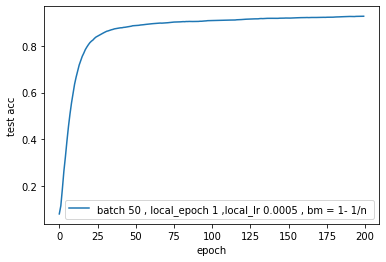

In [7]:
test_acc = []
total_nodes = 10
def parse_logs(numRuns, input_file_directory):
    for i in range(0, numRuns):

        fname = input_file_directory + "/log_1_" + str(total_nodes) + ".log"
        lines = [line.rstrip('\n') for line in open(fname)]
        for line in lines:
            idx = line.find("Test Acc")
            if idx != -1:
                timestamp = line[7:20]
                test_acc.append(line[(idx + 12):(idx+19)])

    return test_acc

parse_logs(1 , "../../Fed_Sys/Fed_log" )

for value in test_acc:
    test_acc[test_acc.index(value)] = float(value)
    
print("test_acc after convert \n" , test_acc)
print("test_acc length \n" ,len( test_acc))
plt.figure()
plt.subplot(1 ,1 ,1)
plt.plot( range(len(test_acc)) , test_acc , '-' , label = "batch 50 , local_epoch 1 ,local_lr 0.0005 , bm = 1- 1/n ")
plt.legend()
plt.xlabel('epoch')
plt.ylabel('test acc')
plt.show()

### 2.experimental data（包含隐私实验） (ksi = 2.0 , ksi_delta =0.5 , --byzantine = 0) 

In [8]:
#node 10 
epsilon1_10 =  [0.0791, 0.1139, 0.1854, 0.262, 0.3237, 0.392, 0.454, 0.5076, 0.5551, 0.5986, 0.6372, 0.6654, 0.6943, 0.7165, 0.7343, 0.7529, 0.7701, 0.7818, 0.7934, 0.803, 0.8104, 0.8192, 0.8244, 0.8311, 0.8358, 0.8387, 0.8434, 0.8456, 0.8488, 0.851, 0.8551, 0.8589, 0.8622, 0.8655, 0.866, 0.8667, 0.869, 0.8702, 0.8721, 0.8728, 0.8748, 0.8761, 0.877, 0.8779, 0.8791, 0.8802, 0.8822, 0.8831, 0.8842, 0.8849, 0.8855, 0.8854, 0.8865, 0.8873, 0.888, 0.8885, 0.89, 0.8901, 0.891, 0.892, 0.8925, 0.8928, 0.893, 0.8937, 0.8943, 0.895, 0.8948, 0.8955, 0.896, 0.8969, 0.8968, 0.8966, 0.897, 0.8979, 0.8988, 0.8989, 0.8987, 0.8995, 0.8999, 0.8995, 0.8995, 0.8995, 0.8997, 0.8997, 0.8994, 0.8992, 0.9002, 0.9011, 0.9011, 0.9024, 0.9027, 0.9033, 0.9036, 0.9045, 0.9041, 0.9046, 0.905, 0.905, 0.9054, 0.9055, 0.9056, 0.9057, 0.9061, 0.9071, 0.9078, 0.9085, 0.9091, 0.9095, 0.9092, 0.91, 0.9103, 0.9106, 0.9109, 0.9112, 0.9106, 0.9112, 0.9114, 0.9122, 0.913, 0.9131, 0.9131, 0.9132, 0.9133, 0.9139, 0.9141, 0.9142, 0.9146, 0.9143, 0.9144, 0.9144, 0.9145, 0.9146, 0.9147, 0.9147, 0.9144, 0.9146, 0.9153, 0.9154, 0.9154, 0.9155, 0.9158, 0.9161, 0.9161, 0.9162, 0.9166, 0.9167, 0.9163, 0.9165, 0.9168, 0.9169, 0.9169, 0.9169, 0.917, 0.917, 0.9171, 0.917, 0.9171, 0.9167, 0.9166, 0.9171, 0.9175, 0.9173, 0.9177, 0.9175, 0.9178, 0.9183, 0.9184, 0.9186, 0.9188, 0.9187, 0.9188, 0.9191, 0.9195, 0.9196, 0.9197, 0.9201, 0.9199, 0.92, 0.9204, 0.9204, 0.9205, 0.9202, 0.9203, 0.9206, 0.9206, 0.921, 0.921, 0.9209, 0.9204, 0.9203, 0.9206, 0.9207, 0.9208, 0.9211, 0.9215, 0.9216, 0.9214, 0.9215, 0.9221, 0.9225]
epsilon2_10 =   [0.0789, 0.1136, 0.1852, 0.2625, 0.3242, 0.392, 0.4544, 0.5083, 0.5561, 0.597, 0.6363, 0.6662, 0.693, 0.7182, 0.7367, 0.7555, 0.7691, 0.7842, 0.7954, 0.8054, 0.8143, 0.8207, 0.8257, 0.8329, 0.8385, 0.8422, 0.846, 0.8494, 0.8529, 0.8567, 0.86, 0.8633, 0.865, 0.8675, 0.8696, 0.8712, 0.8735, 0.8748, 0.8765, 0.877, 0.8781, 0.8784, 0.8799, 0.8805, 0.8816, 0.8828, 0.8842, 0.885, 0.8869, 0.8874, 0.8879, 0.8885, 0.8889, 0.8901, 0.8907, 0.8914, 0.8924, 0.8931, 0.8939, 0.8946, 0.8954, 0.8959, 0.8964, 0.8971, 0.8975, 0.8983, 0.8985, 0.8981, 0.8985, 0.8986, 0.8992, 0.9, 0.9008, 0.9018, 0.9022, 0.9028, 0.903, 0.9028, 0.9031, 0.9037, 0.9043, 0.9047, 0.9044, 0.9052, 0.9051, 0.9055, 0.9052, 0.9052, 0.9053, 0.9051, 0.9052, 0.9056, 0.9063, 0.9063, 0.9071, 0.9075, 0.9079, 0.9088, 0.909, 0.9093, 0.9097, 0.9096, 0.91, 0.9104, 0.9106, 0.9108, 0.9109, 0.9112, 0.9111, 0.9111, 0.9112, 0.9113, 0.9114, 0.9114, 0.9117, 0.9117, 0.9126, 0.9128, 0.9134, 0.9135, 0.9141, 0.9147, 0.915, 0.9153, 0.9153, 0.9157, 0.9159, 0.9162, 0.9166, 0.9165, 0.9167, 0.9176, 0.918, 0.9176, 0.918, 0.9187, 0.9188, 0.9187, 0.9186, 0.9189, 0.9189, 0.9187, 0.9189, 0.9188, 0.9194, 0.9194, 0.9198, 0.9197, 0.9201, 0.9199, 0.92, 0.9199, 0.9201, 0.9203, 0.9209, 0.9211, 0.9214, 0.9213, 0.9218, 0.9218, 0.9218, 0.9221, 0.9224, 0.922, 0.9223, 0.9225, 0.9224, 0.9226, 0.9225, 0.9227, 0.923, 0.9231, 0.923, 0.9232, 0.923, 0.9235, 0.9235, 0.9237, 0.9238, 0.9238, 0.9243, 0.9247, 0.9248, 0.9251, 0.9256, 0.9257, 0.926, 0.9262, 0.9263, 0.9266, 0.9269, 0.9267, 0.9265, 0.9265, 0.9272, 0.9273, 0.9273, 0.9278, 0.9277, 0.9278]
without_epsilon_10 = [0.6196, 0.7752, 0.8074, 0.8324, 0.8604, 0.8647, 0.8588, 0.8719, 0.8794, 0.8877, 0.8887, 0.8951, 0.896, 0.9028, 0.893, 0.9064, 0.9068, 0.9167, 0.9156, 0.9185, 0.921, 0.9211, 0.9244, 0.9255, 0.9309, 0.9292, 0.9321, 0.932, 0.933, 0.9322, 0.9365, 0.9363, 0.9369, 0.9395, 0.9391, 0.9387, 0.9396, 0.9403, 0.9406, 0.9406, 0.94, 0.9419, 0.941, 0.9437, 0.9439, 0.9451, 0.9461, 0.9454, 0.9455, 0.9472, 0.9477, 0.9472, 0.9474, 0.9477, 0.9478, 0.9489, 0.9492, 0.9487, 0.949, 0.9508, 0.9499, 0.9503, 0.9496, 0.9501, 0.9504, 0.9501, 0.9508, 0.951, 0.9505, 0.9507, 0.9506, 0.9511, 0.9523, 0.9527, 0.9514, 0.9518, 0.9524, 0.953, 0.9537, 0.9528, 0.9529, 0.954, 0.9542, 0.9532, 0.9533, 0.9531, 0.9531, 0.9539, 0.9554, 0.9552, 0.9556, 0.9544, 0.9554, 0.9562, 0.956, 0.9553, 0.9556, 0.9557, 0.9559, 0.9556, 0.9562, 0.9564, 0.9566, 0.9566, 0.9572, 0.9573, 0.958, 0.9578, 0.9584, 0.9584, 0.9587, 0.9584, 0.9584, 0.9575, 0.9574, 0.9576, 0.9576, 0.9579, 0.9583, 0.9583, 0.9579, 0.9579, 0.9578, 0.9572, 0.9577, 0.958, 0.9582, 0.9586, 0.9591, 0.9593, 0.9597, 0.9599, 0.9588, 0.9589, 0.9593, 0.9601, 0.9589, 0.9592, 0.9592, 0.9595, 0.9602, 0.9602, 0.9597, 0.9596, 0.9598, 0.9596, 0.9593, 0.9593, 0.9591, 0.9598, 0.9598, 0.9602, 0.9601, 0.9602, 0.9604, 0.9601, 0.9596, 0.96, 0.9596, 0.9603, 0.9602, 0.9604, 0.9602, 0.9606, 0.9612, 0.9607, 0.9602, 0.9596, 0.9587, 0.9597, 0.9598, 0.9604, 0.9607, 0.9601, 0.9601, 0.9597, 0.9605, 0.9608, 0.96, 0.9597, 0.9604, 0.9605, 0.9606, 0.9604, 0.9608, 0.9613, 0.9603, 0.9602, 0.96, 0.96, 0.9605, 0.9611, 0.9613, 0.961, 0.9611, 0.9605, 0.9599, 0.9596, 0.9594, 0.9603]

In [9]:
#node 15 
epsilon1_15 =  [0.0756, 0.0962, 0.1379, 0.2034, 0.2654, 0.3198, 0.3757, 0.4264, 0.4789, 0.522, 0.5599, 0.5952, 0.6279, 0.6562, 0.6798, 0.7012, 0.718, 0.7358, 0.7512, 0.7646, 0.7784, 0.7873, 0.7989, 0.8068, 0.8129, 0.8187, 0.8228, 0.8266, 0.829, 0.8312, 0.835, 0.8366, 0.8392, 0.8427, 0.8454, 0.8482, 0.8505, 0.8524, 0.8546, 0.8568, 0.8599, 0.8615, 0.8633, 0.8645, 0.8664, 0.8677, 0.8677, 0.8681, 0.8697, 0.8701, 0.8712, 0.872, 0.8732, 0.8749, 0.8761, 0.8772, 0.8775, 0.8789, 0.8794, 0.8795, 0.8807, 0.8813, 0.8822, 0.8823, 0.8825, 0.8828, 0.8836, 0.8842, 0.8839, 0.8839, 0.8852, 0.8854, 0.8864, 0.8868, 0.8869, 0.8873, 0.8876, 0.8884, 0.8892, 0.8898, 0.8899, 0.8897, 0.8904, 0.8912, 0.8912, 0.8913, 0.8919, 0.8924, 0.8932, 0.8935, 0.8937, 0.8944, 0.895, 0.8958, 0.8961, 0.8965, 0.8966, 0.8972, 0.8978, 0.8972, 0.8975, 0.8984, 0.8991, 0.8997, 0.8999, 0.9006, 0.9013, 0.9021, 0.9031, 0.9035, 0.9039, 0.9044, 0.9053, 0.9058, 0.9057, 0.9053, 0.9062, 0.9062, 0.9065, 0.9066, 0.9069, 0.9071, 0.9069, 0.9073, 0.9075, 0.907, 0.9077, 0.9077, 0.9077, 0.9086, 0.909, 0.9086, 0.9091, 0.9091, 0.9095, 0.9094, 0.9094, 0.91, 0.9101, 0.9099, 0.9098, 0.91, 0.9103, 0.9105, 0.9101, 0.9106, 0.9106, 0.9106, 0.911, 0.9111, 0.9109, 0.9109, 0.9119, 0.9119, 0.912, 0.9122, 0.9125, 0.9128, 0.9128, 0.9128, 0.913, 0.913, 0.9131, 0.9131, 0.9132, 0.9131, 0.9131, 0.9131, 0.913, 0.9128, 0.9137, 0.9136, 0.9142, 0.9145, 0.9146, 0.9146, 0.9149, 0.9149, 0.9152, 0.9159, 0.9156, 0.9159, 0.9163, 0.916, 0.9156, 0.9156, 0.9155, 0.916, 0.9165, 0.9165, 0.9169, 0.917, 0.9167, 0.9168, 0.9167, 0.9169, 0.9173, 0.9174, 0.9172, 0.9174]
epsilon2_15 =  [0.0756, 0.0959, 0.1373, 0.2035, 0.2665, 0.3194, 0.378, 0.4304, 0.4837, 0.5246, 0.5663, 0.6011, 0.6327, 0.6609, 0.6835, 0.7053, 0.725, 0.7406, 0.7558, 0.7688, 0.7817, 0.7917, 0.8013, 0.8097, 0.8157, 0.8206, 0.8247, 0.8297, 0.8335, 0.8343, 0.8369, 0.84, 0.8421, 0.8453, 0.8496, 0.8518, 0.8548, 0.8579, 0.8611, 0.8636, 0.8648, 0.8663, 0.8695, 0.8711, 0.8728, 0.8735, 0.8743, 0.875, 0.8756, 0.8764, 0.8776, 0.8781, 0.8799, 0.8807, 0.8821, 0.8836, 0.8843, 0.885, 0.8854, 0.8856, 0.8861, 0.887, 0.8878, 0.8877, 0.8881, 0.8891, 0.8907, 0.8909, 0.8909, 0.8915, 0.8927, 0.8931, 0.894, 0.8943, 0.8946, 0.8948, 0.8955, 0.8954, 0.8961, 0.8964, 0.8969, 0.8976, 0.8981, 0.8986, 0.8986, 0.8992, 0.8997, 0.9004, 0.9007, 0.9014, 0.9016, 0.9019, 0.9013, 0.9016, 0.9021, 0.9024, 0.9025, 0.9029, 0.9032, 0.9039, 0.9047, 0.9052, 0.9056, 0.9056, 0.9061, 0.9062, 0.907, 0.9073, 0.9074, 0.9078, 0.9076, 0.9076, 0.9081, 0.9081, 0.9085, 0.9085, 0.9089, 0.909, 0.909, 0.9096, 0.9102, 0.9104, 0.9106, 0.9105, 0.9106, 0.9108, 0.9108, 0.9112, 0.9114, 0.9116, 0.9117, 0.9123, 0.9127, 0.9126, 0.913, 0.9134, 0.9135, 0.9133, 0.9136, 0.9141, 0.9144, 0.9143, 0.9148, 0.9149, 0.9153, 0.9154, 0.9156, 0.9158, 0.9159, 0.9162, 0.9162, 0.9162, 0.917, 0.9169, 0.9174, 0.9176, 0.9178, 0.9177, 0.918, 0.918, 0.9179, 0.9178, 0.9178, 0.9184, 0.9186, 0.9188, 0.919, 0.9188, 0.919, 0.9193, 0.9197, 0.9198, 0.9203, 0.9208, 0.9212, 0.9214, 0.9219, 0.922, 0.9219, 0.9217, 0.9221, 0.9219, 0.9221, 0.9219, 0.922, 0.9221, 0.922, 0.922, 0.922, 0.9218, 0.9216, 0.9219, 0.9221, 0.922, 0.9224, 0.922, 0.9224, 0.9229, 0.9234, 0.9235]
without_epsilon_15 =  [0.54, 0.7312, 0.7932, 0.8003, 0.8327, 0.8548, 0.8564, 0.8459, 0.8554, 0.8691, 0.8699, 0.8738, 0.8778, 0.8748, 0.8809, 0.877, 0.8785, 0.8844, 0.8938, 0.9015, 0.9037, 0.9027, 0.8999, 0.9127, 0.91, 0.9089, 0.9126, 0.9104, 0.919, 0.9219, 0.9231, 0.9207, 0.9255, 0.9275, 0.926, 0.9266, 0.9286, 0.9293, 0.9324, 0.934, 0.9309, 0.9314, 0.9326, 0.9342, 0.9336, 0.9324, 0.934, 0.9369, 0.9384, 0.9374, 0.9378, 0.9386, 0.9395, 0.9408, 0.9408, 0.9408, 0.9408, 0.9432, 0.9447, 0.9458, 0.9452, 0.9447, 0.9443, 0.9443, 0.9461, 0.9443, 0.9466, 0.947, 0.9465, 0.9467, 0.9474, 0.947, 0.9468, 0.9464, 0.9475, 0.9479, 0.9487, 0.9492, 0.9498, 0.9504, 0.9508, 0.9521, 0.9522, 0.9507, 0.9513, 0.9517, 0.9503, 0.9507, 0.9513, 0.9515, 0.9527, 0.952, 0.952, 0.953, 0.954, 0.9534, 0.9531, 0.953, 0.9539, 0.9531, 0.9539, 0.9541, 0.9546, 0.9553, 0.9545, 0.9543, 0.9552, 0.9557, 0.9558, 0.9549, 0.954, 0.9547, 0.9558, 0.9559, 0.9551, 0.9557, 0.9549, 0.955, 0.9557, 0.955, 0.9564, 0.9559, 0.957, 0.9563, 0.9554, 0.9569, 0.9569, 0.9563, 0.9549, 0.9561, 0.9562, 0.9569, 0.9562, 0.9561, 0.9569, 0.9558, 0.9557, 0.9543, 0.9555, 0.956, 0.9565, 0.9555, 0.9556, 0.9548, 0.9558, 0.9568, 0.9566, 0.956, 0.9569, 0.9573, 0.9573, 0.9573, 0.9569, 0.9559, 0.9568, 0.9562, 0.9557, 0.957, 0.9571, 0.9562, 0.9569, 0.9574, 0.9564, 0.9567, 0.9567, 0.9568, 0.958, 0.9585, 0.9576, 0.9572, 0.9576, 0.9579, 0.9579, 0.9571, 0.9562, 0.956, 0.9568, 0.9579, 0.9579, 0.9575, 0.9563, 0.9566, 0.9571, 0.9586, 0.9581, 0.9577, 0.9569, 0.9568, 0.958, 0.9578, 0.9578, 0.9563, 0.9578, 0.9575, 0.9583, 0.9588, 0.958, 0.9579, 0.957, 0.9578]

In [10]:
#node 20 
epsilon1_20 =  [0.0729, 0.0846, 0.1158, 0.1666, 0.2263, 0.2749, 0.3243, 0.3748, 0.42, 0.4692, 0.5077, 0.5461, 0.5819, 0.6115, 0.6396, 0.664, 0.6853, 0.7061, 0.7198, 0.7351, 0.7483, 0.7625, 0.7768, 0.7864, 0.7937, 0.8011, 0.8112, 0.817, 0.8213, 0.8255, 0.8289, 0.8337, 0.8356, 0.8382, 0.8413, 0.8418, 0.8445, 0.847, 0.8511, 0.8526, 0.8545, 0.8561, 0.8577, 0.8596, 0.8611, 0.8633, 0.8655, 0.8687, 0.8695, 0.8709, 0.8727, 0.8739, 0.8738, 0.8742, 0.8754, 0.8764, 0.8762, 0.8774, 0.8781, 0.8788, 0.8802, 0.8809, 0.8814, 0.882, 0.8824, 0.8837, 0.8843, 0.8851, 0.886, 0.8862, 0.8867, 0.8871, 0.8876, 0.8878, 0.8889, 0.8896, 0.889, 0.8896, 0.8905, 0.8909, 0.8909, 0.8916, 0.8929, 0.8928, 0.8933, 0.8938, 0.8946, 0.8949, 0.895, 0.8948, 0.8951, 0.8959, 0.8957, 0.8956, 0.8962, 0.8961, 0.8964, 0.8969, 0.8975, 0.8979, 0.8992, 0.8996, 0.9001, 0.9005, 0.9005, 0.9006, 0.901, 0.9005, 0.9004, 0.9002, 0.9002, 0.9003, 0.9004, 0.9011, 0.9015, 0.902, 0.9026, 0.9025, 0.9035, 0.9038, 0.9034, 0.9038, 0.9044, 0.9042, 0.9047, 0.905, 0.9049, 0.9048, 0.9047, 0.9049, 0.9054, 0.9053, 0.9055, 0.9054, 0.9049, 0.9045, 0.905, 0.905, 0.9054, 0.9059, 0.906, 0.906, 0.9064, 0.9065, 0.9064, 0.9071, 0.9073, 0.9078, 0.908, 0.908, 0.9082, 0.9091, 0.9091, 0.9094, 0.9092, 0.9088, 0.9089, 0.9091, 0.9094, 0.9098, 0.9102, 0.91, 0.9103, 0.91, 0.9098, 0.9098, 0.9101, 0.9103, 0.9101, 0.9098, 0.91, 0.9104, 0.9108, 0.9108, 0.9108, 0.9112, 0.9108, 0.9109, 0.9113, 0.9119, 0.9124, 0.9125, 0.9125, 0.9126, 0.9132, 0.9136, 0.9137, 0.9139, 0.9136, 0.9139, 0.914, 0.9143, 0.9145, 0.9144, 0.9144, 0.9137, 0.9134, 0.9129, 0.9136, 0.9141]
epsilon2_20 =  [0.0728, 0.0841, 0.1159, 0.1656, 0.2258, 0.2746, 0.327, 0.3776, 0.4235, 0.4713, 0.5108, 0.5518, 0.5845, 0.6143, 0.6427, 0.6685, 0.6876, 0.7064, 0.7239, 0.7382, 0.7527, 0.7645, 0.7775, 0.7871, 0.7952, 0.804, 0.812, 0.8187, 0.8245, 0.8268, 0.8325, 0.8359, 0.839, 0.8404, 0.8433, 0.8459, 0.8478, 0.8495, 0.8517, 0.8545, 0.8572, 0.8586, 0.8603, 0.8625, 0.8645, 0.866, 0.8686, 0.8702, 0.8707, 0.8728, 0.8737, 0.8739, 0.8754, 0.8766, 0.8769, 0.8783, 0.8793, 0.8806, 0.8819, 0.8832, 0.8838, 0.8838, 0.8845, 0.885, 0.8855, 0.8862, 0.8868, 0.8871, 0.8878, 0.889, 0.8898, 0.8902, 0.891, 0.8917, 0.8922, 0.8927, 0.8931, 0.8939, 0.8947, 0.8954, 0.8963, 0.8967, 0.8975, 0.8979, 0.898, 0.8982, 0.8986, 0.8988, 0.8994, 0.8999, 0.9, 0.9003, 0.9004, 0.9006, 0.9012, 0.9013, 0.9008, 0.9015, 0.9024, 0.9029, 0.9036, 0.9039, 0.9041, 0.9041, 0.9045, 0.9044, 0.9047, 0.905, 0.9054, 0.9059, 0.9062, 0.9064, 0.9067, 0.9071, 0.9078, 0.9082, 0.9083, 0.9085, 0.9088, 0.909, 0.9092, 0.9094, 0.9096, 0.9091, 0.9092, 0.9091, 0.9095, 0.9095, 0.9097, 0.9099, 0.9105, 0.9106, 0.9111, 0.9113, 0.9117, 0.9122, 0.912, 0.9123, 0.9124, 0.9125, 0.9122, 0.9124, 0.9128, 0.9131, 0.9132, 0.9133, 0.9134, 0.9137, 0.9137, 0.914, 0.9143, 0.9145, 0.9147, 0.9151, 0.9153, 0.9152, 0.9155, 0.9159, 0.9163, 0.9165, 0.9168, 0.9167, 0.9167, 0.9169, 0.9169, 0.9164, 0.9164, 0.9165, 0.9164, 0.9165, 0.9163, 0.9168, 0.9173, 0.9176, 0.9179, 0.9178, 0.9181, 0.9182, 0.9187, 0.9188, 0.9186, 0.9185, 0.9185, 0.9184, 0.9183, 0.9185, 0.9188, 0.9186, 0.9192, 0.9195, 0.9196, 0.9196, 0.9197, 0.9198, 0.9199, 0.9198, 0.9198, 0.9199, 0.92, 0.9204]
without_epsilon_20 = [0.4685, 0.6902, 0.7681, 0.7924, 0.8079, 0.8407, 0.8501, 0.8515, 0.8388, 0.8421, 0.8617, 0.8647, 0.8683, 0.8734, 0.8697, 0.8614, 0.8685, 0.8542, 0.8722, 0.8722, 0.8841, 0.8903, 0.8932, 0.8964, 0.8919, 0.8989, 0.9036, 0.9006, 0.9001, 0.8999, 0.9034, 0.9108, 0.9124, 0.9173, 0.9078, 0.9136, 0.9176, 0.9177, 0.9132, 0.918, 0.9175, 0.923, 0.9233, 0.924, 0.9227, 0.925, 0.9288, 0.9238, 0.9267, 0.9254, 0.928, 0.9288, 0.931, 0.9289, 0.93, 0.9325, 0.9297, 0.9355, 0.9298, 0.9332, 0.9341, 0.9345, 0.9362, 0.9386, 0.9395, 0.9369, 0.9407, 0.9391, 0.938, 0.9437, 0.9397, 0.9415, 0.9411, 0.9413, 0.9432, 0.943, 0.9444, 0.9439, 0.9431, 0.9437, 0.9443, 0.9439, 0.945, 0.9442, 0.9446, 0.9449, 0.9447, 0.943, 0.9461, 0.947, 0.9473, 0.9468, 0.9464, 0.9475, 0.9476, 0.9477, 0.9471, 0.9473, 0.9475, 0.9476, 0.9479, 0.9472, 0.9482, 0.9499, 0.9518, 0.9517, 0.9505, 0.9508, 0.9503, 0.9507, 0.9508, 0.9506, 0.9512, 0.9504, 0.9528, 0.9528, 0.9529, 0.9523, 0.9514, 0.9516, 0.9508, 0.9517, 0.9517, 0.9523, 0.9517, 0.9514, 0.9514, 0.9526, 0.9522, 0.9527, 0.9525, 0.9524, 0.9511, 0.9522, 0.953, 0.9531, 0.9524, 0.9531, 0.954, 0.9532, 0.9544, 0.9532, 0.9536, 0.9524, 0.9538, 0.9537, 0.9549, 0.9533, 0.9531, 0.9529, 0.9537, 0.9535, 0.9529, 0.9543, 0.953, 0.9542, 0.9541, 0.9541, 0.9536, 0.9533, 0.9543, 0.9544, 0.9558, 0.9552, 0.9554, 0.9553, 0.9556, 0.9559, 0.9556, 0.9554, 0.9561, 0.9564, 0.9561, 0.9559, 0.956, 0.9564, 0.9571, 0.9567, 0.9557, 0.9574, 0.9561, 0.9564, 0.9569, 0.9565, 0.9567, 0.9567, 0.9565, 0.9578, 0.9569, 0.9571, 0.9559, 0.9575, 0.9554, 0.9551, 0.9568, 0.9556, 0.9566, 0.9581, 0.9581, 0.9566]

### 3.1 Test the accuracy of BFL with different number of nodes
#### node = 10 15 20


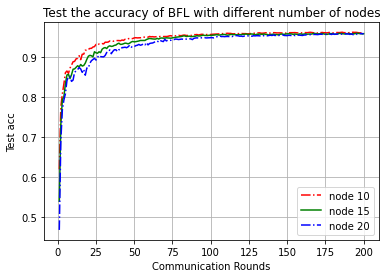

In [11]:
import matplotlib.pyplot as plt
import numpy as np
def Plot(without_epsilon_10,without_epsilon_15,without_epsilon_20 ) :
  # plot train loss
  fig, ax = plt.subplots()
  x_axis = np.arange(1, len(without_epsilon_10)+1)
  y_axis_loss1 = np.array(without_epsilon_10)
  y_axis_loss2 = np.array(without_epsilon_15)
  y_axis_loss3 = np.array(without_epsilon_20)
  ax.plot(x_axis, y_axis_loss1 , 'r-.',label = 'node 10')
  ax.plot(x_axis, y_axis_loss2 , 'g',label = 'node 15')
  ax.plot(x_axis, y_axis_loss3 , 'b-.',label = 'node 20')
  
 

  ax.set(xlabel='Communication Rounds', ylabel='Test acc',
       title="Test the accuracy of BFL with different number of nodes")
  ax.grid()
  plt.legend()
#   fig.savefig("CNN net on IID-Mnist dataset"+'.jpg', format='jpg')

Plot(without_epsilon_10,without_epsilon_15,without_epsilon_20 )

### 3.2 Test the influence of different specific gravity Byzantine nodes on system accuracy
#### posion node = none 10% 20% 30% 
#### total 20 nodes ( 2 4 6) -off_private_train=true ksi=1.5 ksi_delts=0.3

In [12]:
#node 20
#ksi=1.5  ksi_delts=0.3
without_epsilon_20 = [0.4685, 0.6902, 0.7681, 0.7924, 0.8079, 0.8407, 0.8501, 0.8515, 0.8388, 0.8421, 0.8617, 0.8647, 0.8683, 0.8734, 0.8697, 0.8614, 0.8685, 0.8542, 0.8722, 0.8722, 0.8841, 0.8903, 0.8932, 0.8964, 0.8919, 0.8989, 0.9036, 0.9006, 0.9001, 0.8999, 0.9034, 0.9108, 0.9124, 0.9173, 0.9078, 0.9136, 0.9176, 0.9177, 0.9132, 0.918, 0.9175, 0.923, 0.9233, 0.924, 0.9227, 0.925, 0.9288, 0.9238, 0.9267, 0.9254, 0.928, 0.9288, 0.931, 0.9289, 0.93, 0.9325, 0.9297, 0.9355, 0.9298, 0.9332, 0.9341, 0.9345, 0.9362, 0.9386, 0.9395, 0.9369, 0.9407, 0.9391, 0.938, 0.9437, 0.9397, 0.9415, 0.9411, 0.9413, 0.9432, 0.943, 0.9444, 0.9439, 0.9431, 0.9437, 0.9443, 0.9439, 0.945, 0.9442, 0.9446, 0.9449, 0.9447, 0.943, 0.9461, 0.947, 0.9473, 0.9468, 0.9464, 0.9475, 0.9476, 0.9477, 0.9471, 0.9473, 0.9475, 0.9476, 0.9479, 0.9472, 0.9482, 0.9499, 0.9518, 0.9517, 0.9505, 0.9508, 0.9503, 0.9507, 0.9508, 0.9506, 0.9512, 0.9504, 0.9528, 0.9528, 0.9529, 0.9523, 0.9514, 0.9516, 0.9508, 0.9517, 0.9517, 0.9523, 0.9517, 0.9514, 0.9514, 0.9526, 0.9522, 0.9527, 0.9525, 0.9524, 0.9511, 0.9522, 0.953, 0.9531, 0.9524, 0.9531, 0.954, 0.9532, 0.9544, 0.9532, 0.9536, 0.9524, 0.9538, 0.9537, 0.9549, 0.9533, 0.9531, 0.9529, 0.9537, 0.9535, 0.9529, 0.9543, 0.953, 0.9542, 0.9541, 0.9541, 0.9536, 0.9533, 0.9543, 0.9544, 0.9558, 0.9552, 0.9554, 0.9553, 0.9556, 0.9559, 0.9556, 0.9554, 0.9561, 0.9564, 0.9561, 0.9559, 0.956, 0.9564, 0.9571, 0.9567, 0.9557, 0.9574, 0.9561, 0.9564, 0.9569, 0.9565, 0.9567, 0.9567, 0.9565, 0.9578, 0.9569, 0.9571, 0.9559, 0.9575, 0.9554, 0.9551, 0.9568, 0.9556, 0.9566, 0.9581, 0.9581, 0.9566]
byzantine2_20 =  [0.3832, 0.6398, 0.7432, 0.7882, 0.7988, 0.8104, 0.8384, 0.8537, 0.8548, 0.8451, 0.8413, 0.8505, 0.862, 0.8626, 0.8655, 0.8719, 0.8773, 0.8745, 0.873, 0.8783, 0.8767, 0.869, 0.8822, 0.8815, 0.883, 0.8909, 0.8946, 0.9003, 0.899, 0.8993, 0.8982, 0.9025, 0.9005, 0.9018, 0.9058, 0.9056, 0.9066, 0.9139, 0.9166, 0.916, 0.9183, 0.9171, 0.9141, 0.9172, 0.9208, 0.9234, 0.9195, 0.9174, 0.9191, 0.9199, 0.9227, 0.9258, 0.9273, 0.9269, 0.9263, 0.9291, 0.9288, 0.9283, 0.9275, 0.9302, 0.9316, 0.9294, 0.9302, 0.9324, 0.9327, 0.9324, 0.9339, 0.9353, 0.9354, 0.9336, 0.9339, 0.9355, 0.9386, 0.94, 0.9386, 0.9375, 0.9379, 0.9376, 0.94, 0.9394, 0.9389, 0.9384, 0.939, 0.9399, 0.9408, 0.9415, 0.9403, 0.9404, 0.9404, 0.941, 0.9415, 0.9426, 0.9431, 0.9424, 0.9436, 0.9425, 0.9427, 0.9434, 0.9432, 0.9454, 0.9444, 0.9445, 0.9449, 0.945, 0.945, 0.9453, 0.9455, 0.9443, 0.9439, 0.9434, 0.9449, 0.9457, 0.9454, 0.9451, 0.945, 0.9454, 0.9447, 0.9457, 0.9447, 0.9433, 0.9434, 0.9458, 0.9446, 0.9447, 0.947, 0.9463, 0.9463, 0.9457, 0.947, 0.946, 0.9473, 0.948, 0.9462, 0.9469, 0.9471, 0.9474, 0.9483, 0.9473, 0.9481, 0.9473, 0.9475, 0.9485, 0.9474, 0.9484, 0.949, 0.9483, 0.9484, 0.9488, 0.9492, 0.9481, 0.9474, 0.9473, 0.9489, 0.9506, 0.9502, 0.95, 0.9508, 0.9505, 0.9495, 0.9502, 0.9505, 0.9502, 0.9496, 0.9502, 0.9494, 0.9501, 0.9497, 0.9503, 0.9496, 0.9507, 0.9498, 0.9503, 0.9512, 0.9516, 0.9508, 0.9508, 0.9501, 0.952, 0.9522, 0.9522, 0.9508, 0.9506, 0.9504, 0.9507, 0.9509, 0.9504, 0.9494, 0.95, 0.9507, 0.9515, 0.9522, 0.9521, 0.9517, 0.9504, 0.9517, 0.9524, 0.9523, 0.9526, 0.9512, 0.9509]
byzantine4_20 =  [0.247, 0.5325, 0.6741, 0.7453, 0.7817, 0.7931, 0.7983, 0.8161, 0.8378, 0.8526, 0.8569, 0.8587, 0.8557, 0.8491, 0.8494, 0.8561, 0.8633, 0.8678, 0.871, 0.8765, 0.8809, 0.8831, 0.8882, 0.8911, 0.8868, 0.8876, 0.8908, 0.8907, 0.8918, 0.8958, 0.8959, 0.8951, 0.8964, 0.9008, 0.9011, 0.9016, 0.9075, 0.9106, 0.9072, 0.9044, 0.9053, 0.9067, 0.9076, 0.9141, 0.9177, 0.9159, 0.9116, 0.913, 0.914, 0.9166, 0.9198, 0.9215, 0.9228, 0.9202, 0.9215, 0.9223, 0.9233, 0.9228, 0.9226, 0.9223, 0.9243, 0.9264, 0.9298, 0.9282, 0.9258, 0.9269, 0.9297, 0.9282, 0.9267, 0.9285, 0.9298, 0.9289, 0.9307, 0.9321, 0.9311, 0.9308, 0.9307, 0.931, 0.9311, 0.9319, 0.9332, 0.9329, 0.9335, 0.9341, 0.9346, 0.9338, 0.9343, 0.9349, 0.9356, 0.9363, 0.9375, 0.9363, 0.9367, 0.9378, 0.9378, 0.9383, 0.9391, 0.9391, 0.9384, 0.9389, 0.941, 0.9406, 0.9399, 0.9409, 0.9417, 0.9416, 0.942, 0.9414, 0.9432, 0.9425, 0.9423, 0.9425, 0.943, 0.944, 0.9435, 0.9437, 0.9442, 0.9439, 0.9428, 0.9425, 0.9438, 0.9452, 0.9445, 0.9447, 0.9447, 0.9446, 0.9431, 0.9413, 0.9404, 0.9411, 0.9409, 0.9418, 0.9441, 0.9442, 0.9442, 0.945, 0.9468, 0.9453, 0.9443, 0.9441, 0.9443, 0.9453, 0.9473, 0.9476, 0.9474, 0.9472, 0.9459, 0.9453, 0.9446, 0.9453, 0.9458, 0.9451, 0.9446, 0.9452, 0.9462, 0.9461, 0.9456, 0.9445, 0.9456, 0.9457, 0.9458, 0.946, 0.9457, 0.9452, 0.9462, 0.9482, 0.9469, 0.9472, 0.9462, 0.9465, 0.946, 0.9453, 0.9462, 0.947, 0.9482, 0.9475, 0.9479, 0.9488, 0.9474, 0.947, 0.9468, 0.9471, 0.9471, 0.9479, 0.948, 0.9486, 0.9489, 0.9486, 0.9475, 0.9475, 0.9486, 0.9487, 0.9479, 0.9474, 0.9477, 0.9491, 0.9485, 0.949, 0.95, 0.9496]
byzantine6_20 =  [0.0807, 0.1194, 0.2052, 0.3292, 0.441, 0.53, 0.5957, 0.6452, 0.6878, 0.7153, 0.7415, 0.7592, 0.7755, 0.7877, 0.7974, 0.8077, 0.8164, 0.8247, 0.8352, 0.843, 0.8471, 0.8518, 0.8567, 0.861, 0.8662, 0.8685, 0.872, 0.873, 0.8748, 0.8754, 0.8771, 0.8789, 0.881, 0.8815, 0.8832, 0.8856, 0.8876, 0.8896, 0.8901, 0.8894, 0.8896, 0.8891, 0.8869, 0.8894, 0.8936, 0.8976, 0.8985, 0.9004, 0.9013, 0.902, 0.901, 0.9008, 0.9016, 0.9025, 0.9033, 0.9046, 0.9078, 0.9096, 0.9098, 0.9093, 0.906, 0.9053, 0.9033, 0.9062, 0.9098, 0.9135, 0.9154, 0.9164, 0.9172, 0.9176, 0.9172, 0.9171, 0.9164, 0.9165, 0.9163, 0.9189, 0.9212, 0.9208, 0.9198, 0.9171, 0.9154, 0.9127, 0.9106, 0.9106, 0.9114, 0.9134, 0.9154, 0.9185, 0.9225, 0.9241, 0.9247, 0.9242, 0.9235, 0.9223, 0.9231, 0.9234, 0.9239, 0.9243, 0.9256, 0.9267, 0.928, 0.9278, 0.9246, 0.9214, 0.9191, 0.9173, 0.917, 0.9182, 0.9201, 0.9224, 0.9246, 0.9276, 0.9289, 0.9285, 0.9281, 0.9283, 0.9274, 0.9276, 0.9286, 0.9295, 0.9298, 0.9293, 0.9277, 0.9259, 0.9254, 0.9235, 0.9222, 0.9224, 0.9245, 0.9266, 0.9276, 0.9295, 0.9309, 0.9314, 0.9315, 0.9313, 0.9307, 0.9307, 0.93, 0.9308, 0.9316, 0.9325, 0.9315, 0.9296, 0.9278, 0.9267, 0.9249, 0.9243, 0.9251, 0.9262, 0.9281, 0.9299, 0.9311, 0.9325, 0.9335, 0.9331, 0.9331, 0.933, 0.9335, 0.9328, 0.9331, 0.9339, 0.9333, 0.9338, 0.9331, 0.9325, 0.9317, 0.9323, 0.9318, 0.9321, 0.9327, 0.9331, 0.9333, 0.9333, 0.9342, 0.9351, 0.9345, 0.9342, 0.9346, 0.9345, 0.935, 0.9342, 0.9352, 0.9354, 0.936, 0.936, 0.9362, 0.9358, 0.9358, 0.9358, 0.9354, 0.935, 0.9348, 0.9351, 0.9349, 0.9347, 0.9348, 0.9349, 0.9357, 0.935]

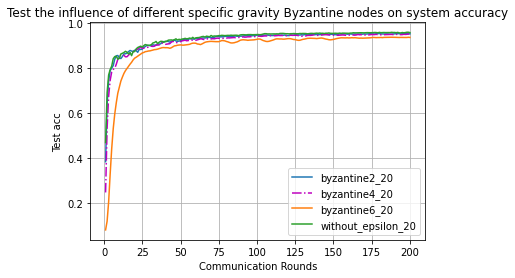

In [18]:
import matplotlib.pyplot as plt
import numpy as np
def Plot(byzantine2_20,byzantine4_20,byzantine6_20 ,without_epsilon_20 ) :
  fig, ax = plt.subplots()
  x_axis = np.arange(1, len(byzantine2_20)+1)
  y_axis_acc1 = np.array(byzantine2_20)
  y_axis_acc2 = np.array(byzantine4_20)
  y_axis_acc3 = np.array(byzantine6_20)
  y_axis_acc4 = np.array(without_epsilon_20)

  ax.plot(x_axis, y_axis_acc1 ,label = 'byzantine2_20')
  ax.plot(x_axis, y_axis_acc2 ,'m-.', label = 'byzantine4_20')
  ax.plot(x_axis, y_axis_acc3 , label = 'byzantine6_20')
  ax.plot(x_axis, y_axis_acc4 , label = 'without_epsilon_20')

  ax.set(xlabel='Communication Rounds', ylabel='Test acc',
       title="Test the influence of different specific gravity Byzantine nodes on system accuracy")
  ax.grid()
  plt.legend()
#   fig.savefig("CNN net on IID-Mnist dataset"+'.jpg', format='jpg')

Plot(byzantine2_20,byzantine4_20,byzantine6_20,without_epsilon_20 )

### 3.3 Test different privacy
#### node = 10 15 20
#### epsilon = 1 ,2

| 节点数 | epsilon | Test accuracy |
|  ---   |   ---   |     ---       |
|  10  | 1 | 0.9225|
|      | 2| 0.9278 |
|  15  | 1 | 0.9174|
|      | 2| 0.9235 |
|  20  | 1 | 0.9141|
|      | 2| 0.9204 |
